# Introduction

In this notebook we will present the polynomial regression through a practical exercise.

## Limitations of linear regression

Linear regression requires the relation between the dependent variable and the independent variable to be linear. What if the distribution of the data was more complex as shown in the below figure? Can linear models be used to fit non-linear data? 

<img src="image_non-linear.png">

How can we generate a curve that best captures this kind of data?

To understand the need for polynomial regression, let’s generate some random dataset first.

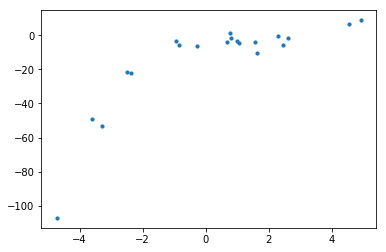

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

Now you should apply a linear model to this data, use the ```LinearRegression``` method from ```sklearn``` and plot the result. Remember that in order to use the ```.fit()``` method you need to add a new axis to x and y

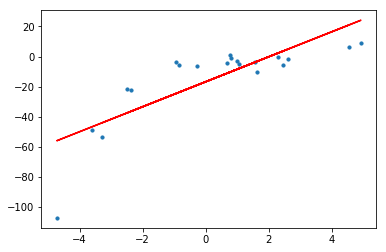

In [2]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred_linear = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred_linear, color='r')
plt.show()

Does the linear model really capture the variability of the data? This is called *under-fitting*. This term is used when the model used to fit the data is too simple to really capture all the complexity of the data. To have a more quantitative measure of this under-fitting, compute the $R²$ and Root Mean Squared Error of the fit.

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

r2 = r2_score(y, y_pred_linear)
rmse = np.sqrt(mse(y, y_pred_linear)) 
print(f'R2 for this prediction: {r2}')
print(f'MSE for this prediction: {rmse}')

R2 for this prediction: 0.6386750054827146
MSE for this prediction: 15.908242501429998


## Polynomial Regression

A pretty straight-forward way to add complexity to this model, is to add powers of the original features as new features. In this manner, the lineal model:

$$y=\theta_0+ \theta_1x$$ 

derives to,

$$y=\theta_0+ \theta_1x + \theta_2x²$$ 

Now the beauty of this trick, is that you are still training a linear model. Which means you can still use the same algorithms to train it, but the curve that this will generate is actually quadratic.

To convert the original features into their higher order terms we will use the ```PolynomialFeatures``` class provided by ```scikit-learn```. And then we will use the same method to fit the curve and print the $R²$ and RMSE values, how do they compare to the previous case?. Do not plot the results just yet!

In [4]:
from sklearn.preprocessing import PolynomialFeatures
import operator

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred_2 = model.predict(x_poly)

rmse = np.sqrt(mse(y,y_poly_pred_2))
r2 = r2_score(y,y_poly_pred_2)
print(f'RMSE for this prediction: {rmse}')
print(f'R2 for this prediction: {r2}')

RMSE for this prediction: 10.120437473614711
R2 for this prediction: 0.8537647164420812


In order to plot the results this time we add this code to sort the x axis so that the plot is comparable (just execute the cell once you have your ```y_pred```. 

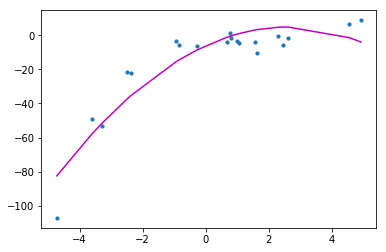

In [5]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred_2), key=sort_axis)
x, y_poly_pred_2 = zip(*sorted_zip)
plt.plot(x, y_poly_pred_2, color='m')
plt.show()

Now try to see what happens if the we fit a polynomial of degree 3. What are the $R²$, and the RMSE? 

In [6]:
from sklearn.preprocessing import PolynomialFeatures
import operator

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred_3 = model.predict(x_poly)

rmse = np.sqrt(mse(y,y_poly_pred_3))
r2 = r2_score(y,y_poly_pred_3)
print(f'RMSE for this prediction: {rmse}')
print(f'R2 for this prediction: {r2}')

RMSE for this prediction: 3.449895507408724
R2 for this prediction: 0.9830071790386679


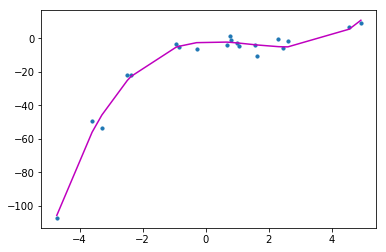

In [7]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred_3), key=sort_axis)
x, y_poly_pred_3 = zip(*sorted_zip)
plt.plot(x, y_poly_pred_3, color='m')
plt.show()

Now fit a model of degree 20, how do RMSE and $R²$ behave. Create a plot with the three fits overlaped. Do you think this is the model that better explains the data? Why?

In [8]:
from sklearn.preprocessing import PolynomialFeatures
import operator

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred_20 = model.predict(x_poly)

rmse = np.sqrt(mse(y,y_poly_pred_20))
r2 = r2_score(y,y_poly_pred_20)
print(f'RMSE for this prediction: {rmse}')
print(f'R2 for this prediction: {r2}')

RMSE for this prediction: 1.1131845658041737
R2 for this prediction: 0.9982307551016784


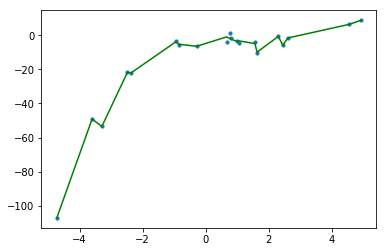

In [9]:
## Degree 20 
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred_20), key=sort_axis)
x, y_poly_pred_20 = zip(*sorted_zip)
plt.plot(x, y_poly_pred_20, color='g')
plt.show()

For degree=20, the model is also capturing the noise in the data. This is an example of *over-fitting*. Even though this model passes through most of the data, it will fail to generalize on unseen data.

To prevent *over-fitting*, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized.
How do we choose an optimal model? To answer this question we need to understand the bias vs variance trade-off.

## Variance vs Bias trade-off

*Bias* refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting.

*Variance* refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.

The below picture summarizes our learning.

<img src="model_comparison.png">

From the below picture we can observe that as the model complexity increases, the bias decreases and the variance increases and vice-versa. Ideally, a machine learning model should have low variance and low bias. But practically it’s impossible to have both. Therefore to achieve a good model that performs well both on the train and unseen data, a trade-off is made. Source: http://scott.fortmann-roe.com/docs/BiasVariance.html

<img src="bias-variance.png">

Think about the behaviour of our metrics to evaluate the performance of the algorithm. Which ways could we use to control if our model is actually performing better?

## Apply polynomial regression to the Boston Housing Dataset

Load the Boston Housing Dataset, and prepare train and test splits ```X_train, Y_train, X_test, Y_test```

In [10]:
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

Define a function which will transform the original features into polynomial features of a given degree and then apply Linear Regression on it.

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def create_polynomial_regression_model(degree, verbose = True):
    "Creates a polynomial regression model for the given degree"

    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))

Apply the function to a polynomial regression of degree 2. How does the result compare to our previous exercise? Would it make sense to use a higher degree?

In [12]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.703071027847754
R2 score of training set is 0.7425094297364767


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.7848198845450356
R2 score of test set is 0.8170372495892182
